# VIIRS MODIS LL Year to Year Comparison

In [1]:
# imports
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.ticker as mtick
import xarray
import h5py 
import pandas as pd

from ulmo import io as ulmo_io
from ulmo.plotting import plotting

# imports
from importlib import reload

from ulmo import io as ulmo_io
import numpy as np
from ulmo import io as ulmo_io
from ulmo.viirs import io as viirs_io
from ulmo.viirs import extract as viirs_extract
from ulmo.plotting import plotting
from ulmo import io as ulmo_io
from ulmo import plotting
from ulmo.llc import io as llc_io
from ulmo.llc import plotting as llc_plotting

from ulmo.utils import image_utils
from ulmo.analysis import figures as ulmo_figs
from ulmo.plotting import plotting as ulmo_plotting

sns.set_style('whitegrid')
sns.set_context('notebook')
pal, cm = plotting.load_palette()

## Modis Tables

In [2]:
modis_tbl = ulmo_io.load_main_table('s3://modis-l2/Tables/MODIS_L2_std.parquet')

Read main table: s3://modis-l2/Tables/MODIS_L2_std.parquet


In [4]:
modis_tbl.head()

,lat,lon,col,datetime,LL,row,clear_fraction,mean_temperature,Tmin,Tmax,T90,T10,filename,UID,pp_file,pp_root,field_size,pp_type,pp_idx
0,13.980967,62.675774,517,2003-03-10 21:25:00,520.178711,304,0.000000,26.199476,25.250000,26.885000,26.474998,25.814999,AQUA_MODIS.20030310T212506.L2.SST.nc,1047103981024267577,s3://modis-l2/PreProc/MODIS_R2019_2003_95clear...,standard,128,0,0
1,13.043748,-102.751816,706,2003-12-12 08:30:00,432.766724,1696,0.049805,28.924648,27.789999,29.654999,29.154999,28.695000,AQUA_MODIS.20031212T083006.L2.SST.nc,107110304377724818,s3://modis-l2/PreProc/MODIS_R2019_2003_95clear...,standard,128,0,1
2,-18.086618,40.844833,581,2003-09-24 22:35:00,764.413086,656,0.006104,25.551611,24.775000,26.154999,25.750000,25.344999,AQUA_MODIS.20030924T223506.L2.SST.nc,106471913422084483,s3://modis-l2/PreProc/MODIS_R2019_2003_95clear...,standard,128,0,2
3,39.071575,18.569141,1028,2003-05-01 01:05:00,371.310120,898,0.049988,16.414951,15.160000,17.205000,16.725000,16.080000,AQUA_MODIS.20030501T010506.L2.SST.nc,1051129071619856914,s3://modis-l2/PreProc/MODIS_R2019_2003_95clear...,standard,128,0,3
4,17.901926,90.155480,997,2003-12-05 19:55:00,-214.759277,1520,0.035461,26.744499,24.975000,28.724998,27.824999,25.830000,AQUA_MODIS.20031205T195506.L2.SST.nc,1070107901927015548,s3://modis-l2/PreProc/MODIS_R2019_2003_95clear...,standard,128,0,4


In [3]:
modis2012 = np.where(modis_tbl.pp_file == 's3://modis-l2/PreProc/MODIS_R2019_2012_95clear_128x128_preproc_std.h5')
modis2013 = np.where(modis_tbl.pp_file == 's3://modis-l2/PreProc/MODIS_R2019_2013_95clear_128x128_preproc_std.h5')
modis2014 = np.where(modis_tbl.pp_file == 's3://modis-l2/PreProc/MODIS_R2019_2014_95clear_128x128_preproc_std.h5')
modis2015 = np.where(modis_tbl.pp_file == 's3://modis-l2/PreProc/MODIS_R2019_2015_95clear_128x128_preproc_std.h5')
modis2016 = np.where(modis_tbl.pp_file == 's3://modis-l2/PreProc/MODIS_R2019_2016_95clear_128x128_preproc_std.h5')
modis2017 = np.where(modis_tbl.pp_file == 's3://modis-l2/PreProc/MODIS_R2019_2017_95clear_128x128_preproc_std.h5')
modis2018 = np.where(modis_tbl.pp_file == 's3://modis-l2/PreProc/MODIS_R2019_2018_95clear_128x128_preproc_std.h5')
modis2019 = np.where(modis_tbl.pp_file == 's3://modis-l2/PreProc/MODIS_R2019_2019_95clear_128x128_preproc_std.h5')

In [4]:
modis_tbl12 = modis_tbl[modis2012[0][0]:modis2012[0][-1]]
modis_tbl13 = modis_tbl[modis2013[0][0]:modis2013[0][-1]]
modis_tbl14 = modis_tbl[modis2014[0][0]:modis2014[0][-1]]
modis_tbl15 = modis_tbl[modis2015[0][0]:modis2015[0][-1]]
modis_tbl16 = modis_tbl[modis2016[0][0]:modis2016[0][-1]]
modis_tbl17 = modis_tbl[modis2017[0][0]:modis2017[0][-1]]
modis_tbl18 = modis_tbl[modis2018[0][0]:modis2018[0][-1]]
modis_tbl19 = modis_tbl[modis2019[0][0]:modis2019[0][-1]]

## VIIRS Tables

In [5]:
viirs_tbl12 = ulmo_io.load_main_table('s3://viirs/Tables/VIIRS_2012_std.parquet')
viirs_tbl13 = ulmo_io.load_main_table('s3://viirs/Tables/VIIRS_2013_std.parquet')
viirs_tbl14 = ulmo_io.load_main_table('s3://viirs/Tables/VIIRS_2014_std.parquet')
viirs_tbl15 = ulmo_io.load_main_table('s3://viirs/Tables/VIIRS_2015_std.parquet')
viirs_tbl16 = ulmo_io.load_main_table('s3://viirs/Tables/VIIRS_2016_std.parquet')
viirs_tbl17 = ulmo_io.load_main_table('s3://viirs/Tables/VIIRS_2017_std.parquet')
viirs_tbl18 = ulmo_io.load_main_table('s3://viirs/Tables/VIIRS_2018_std.parquet')
viirs_tbl19 = ulmo_io.load_main_table('s3://viirs/Tables/VIIRS_2019_std.parquet')

Read main table: s3://viirs/Tables/VIIRS_2012_std.parquet
Read main table: s3://viirs/Tables/VIIRS_2013_std.parquet
Read main table: s3://viirs/Tables/VIIRS_2014_std.parquet
Read main table: s3://viirs/Tables/VIIRS_2015_std.parquet
Read main table: s3://viirs/Tables/VIIRS_2016_std.parquet
Read main table: s3://viirs/Tables/VIIRS_2017_std.parquet
Read main table: s3://viirs/Tables/VIIRS_2018_std.parquet
Read main table: s3://viirs/Tables/VIIRS_2019_std.parquet


## 2012

In [11]:
viirs_tbl = viirs_tbl12
modis_tbl = modis_tbl12

In [12]:
viirs_tbl.head()

,filename,row,col,lat,lon,clear_fraction,field_size,datetime,ex_filename,pp_file,pp_root,pp_idx,pp_type,mean_temperature,Tmin,Tmax,T90,T10,LL
0,s3://viirs/data/2012/032/20120201000000-OSPO-L...,5040,960,-0.111252,-156.94357,0.034370,192,2012-02-01,s3://viirs/Extractions/VIIRS_2012_95clear_192x...,s3://viirs/PreProc/VIIRS_2012_95clear_192x192_...,viirs_std,885541,0,25.274851,23.549988,27.100006,25.600006,24.989990,152.320679
1,s3://viirs/data/2012/032/20120201000000-OSPO-L...,5051,899,0.047520,-156.38885,0.049995,192,2012-02-01,s3://viirs/Extractions/VIIRS_2012_95clear_192x...,s3://viirs/PreProc/VIIRS_2012_95clear_192x192_...,viirs_std,529694,0,25.340801,23.549988,27.859985,25.769989,24.989990,98.993835
2,s3://viirs/data/2012/032/20120201000000-OSPO-L...,5089,921,0.267114,-156.62868,0.049778,192,2012-02-01,s3://viirs/Extractions/VIIRS_2012_95clear_192x...,s3://viirs/PreProc/VIIRS_2012_95clear_192x192_...,viirs_std,386280,0,25.321354,23.549988,27.279999,25.690002,25.000000,183.892456
3,s3://viirs/data/2012/032/20120201000000-OSPO-L...,5127,2346,-1.188727,-167.94283,0.049669,192,2012-02-01,s3://viirs/Extractions/VIIRS_2012_95clear_192x...,s3://viirs/PreProc/VIIRS_2012_95clear_192x192_...,viirs_std,5160,0,26.367399,24.450012,27.369995,26.709991,26.059998,254.753418
4,s3://viirs/data/2012/032/20120201000000-OSPO-L...,5136,960,0.514633,-157.08434,0.031331,192,2012-02-01,s3://viirs/Extractions/VIIRS_2012_95clear_192x...,s3://viirs/PreProc/VIIRS_2012_95clear_192x192_...,viirs_std,149633,0,25.346376,23.760010,27.350006,25.679993,25.049988,251.095093


In [23]:
modis_tbl.head()

,lat,lon,col,datetime,LL,row,clear_fraction,mean_temperature,Tmin,Tmax,T90,T10,filename,UID,pp_file,pp_root,field_size,pp_type,pp_idx
6545650,-18.549124,37.615513,581,2012-04-07 22:50:00,44.542786,1160,0.049438,27.188114,25.195000,28.295000,27.754999,26.730000,AQUA_MODIS.20120407T225008.L2.SST.nc,133371450921761551,s3://modis-l2/PreProc/MODIS_R2019_2012_95clear...,standard,128,0,0
6545651,34.162098,19.459482,901,2012-06-21 00:50:00,340.431274,1456,0.002197,24.707409,23.840000,25.764999,25.055000,24.375000,AQUA_MODIS.20120621T005008.L2.SST.nc,1340124162119945948,s3://modis-l2/PreProc/MODIS_R2019_2012_95clear...,standard,128,0,1
6545652,32.603806,27.425474,709,2012-08-23 00:10:00,390.714600,272,0.001282,27.301708,26.174999,28.174999,27.689999,26.894999,AQUA_MODIS.20120823T001009.L2.SST.nc,1345122603820742547,s3://modis-l2/PreProc/MODIS_R2019_2012_95clear...,standard,128,0,2
6545653,20.958315,63.330322,741,2012-05-03 21:40:00,518.235229,16,0.001221,27.800322,26.969999,28.445000,28.099998,27.504999,AQUA_MODIS.20120503T214008.L2.SST.nc,1336110958324333032,s3://modis-l2/PreProc/MODIS_R2019_2012_95clear...,standard,128,0,3
6545654,74.844040,-62.575737,901,2012-09-24 14:40:00,334.312744,720,0.000000,3.775120,2.320000,4.665000,4.250000,3.085000,AQUA_MODIS.20120924T144009.L2.SST.nc,1348164844011742426,s3://modis-l2/PreProc/MODIS_R2019_2012_95clear...,standard,128,0,4


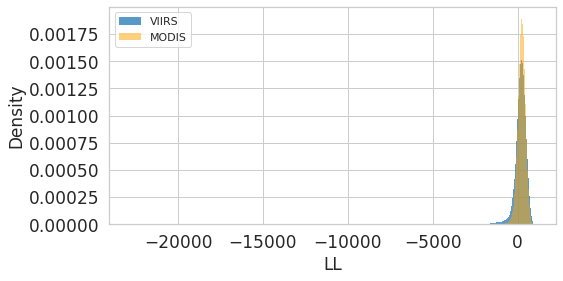

In [39]:
fig = plt.figure(figsize=(8,4))

ax = sns.histplot(data=viirs_tbl, x='LL',alpha=0.75, stat='density',label = 'VIIRS')
ax = sns.histplot(data=modis_tbl, x='LL',color='orange',alpha=0.5, stat='density',label = 'MODIS')
plotting.set_fontsize(ax, 17.)
plt.legend()
plt.show()

In [2]:
viirs_tbl = ulmo_io.load_main_table('s3://viirs/Tables/VIIRS_all_99clear_std.parquet')
modis_tbl = ulmo_io.load_main_table('s3://modis-l2/Tables/MODIS_L2_std.parquet')


Read main table: s3://viirs/Tables/VIIRS_all_99clear_std.parquet
Read main table: s3://modis-l2/Tables/MODIS_L2_std.parquet


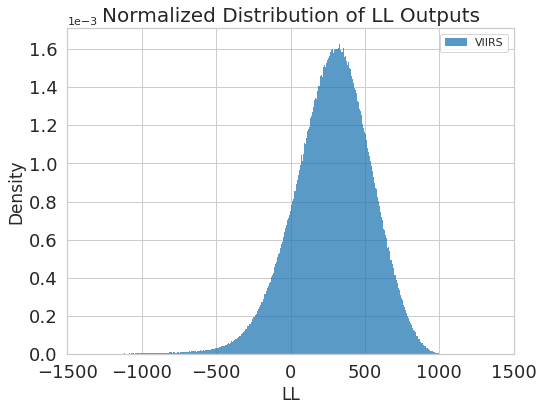

In [12]:

fig = plt.figure(figsize=(8,6))

ax = sns.histplot(data=viirs_tbl, x='LL',alpha=0.75, stat='density',label = 'VIIRS')
#ax = sns.histplot(data=modis_tbl, x='LL',color='orange',alpha=0.5, stat='density',label = 'MODIS')
plotting.set_fontsize(ax, 17.)
plt.xlim(-1500,1500)
plt.title('Normalized Distribution of LL Outputs',fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.legend()
#plt.vlines(200,0,0.00175,color='mediumvioletred')
#plt.vlines(450,0,0.00175,color='mediumvioletred')
#plt.hlines(0.00175,200,450,color='mediumvioletred')



#plt.vlines(700,0,0.00175,color='orange')
#plt.vlines(950,0,0.00175,color='orange')
#plt.hlines(0.00175,700,950,color='orange')

plt.savefig('test.png')
plt.show()

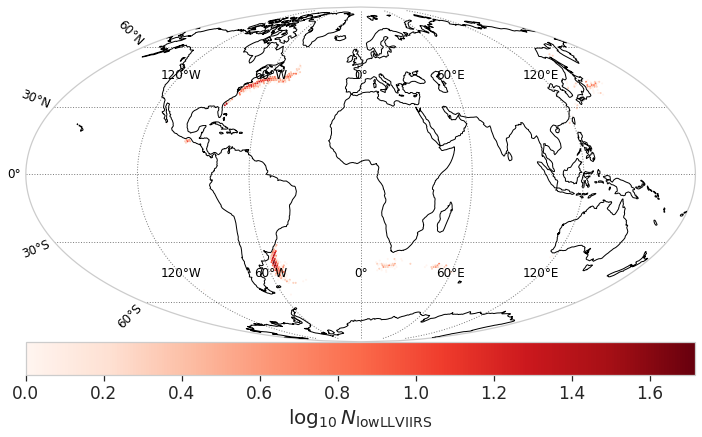

In [11]:
low_LL_V = viirs_tbl.LL < -2000.
_ = ulmo_figs.show_spatial(viirs_tbl[low_LL_V], lbl='low LL VIIRS')

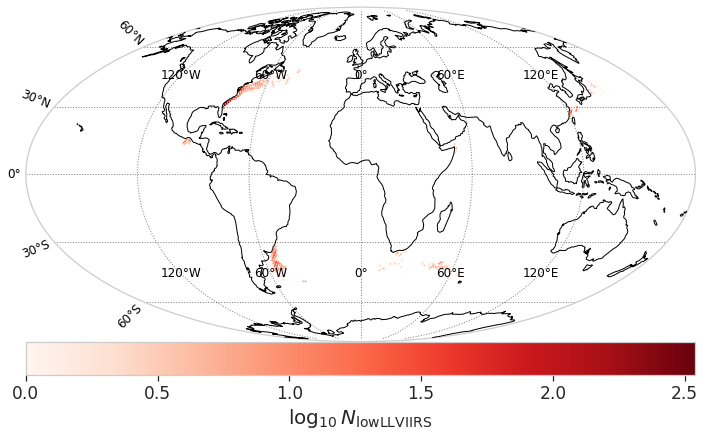

In [10]:
low_LL_V = modis_tbl.LL < -2000.
_ = ulmo_figs.show_spatial(modis_tbl[low_LL_V], lbl='low LL VIIRS')

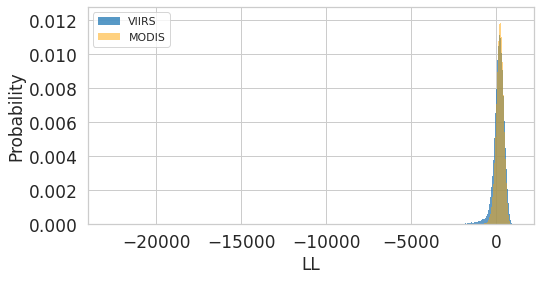

In [40]:
fig = plt.figure(figsize=(8,4))

ax = sns.histplot(data=viirs_tbl, x='LL',alpha=0.75, stat='probability',label = 'VIIRS')
ax = sns.histplot(data=modis_tbl, x='LL',color='orange',alpha=0.5, stat='probability',label = 'MODIS')
plotting.set_fontsize(ax, 17.)
plt.legend()
plt.show()

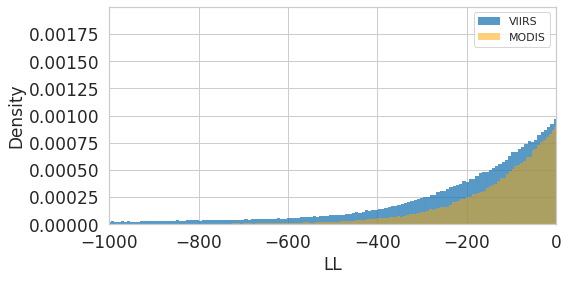

In [42]:
fig = plt.figure(figsize=(8,4))

ax = sns.histplot(data=viirs_tbl, x='LL',alpha=0.75, stat='density',label = 'VIIRS')
ax = sns.histplot(data=modis_tbl, x='LL',color='orange',alpha=0.5, stat='density',label = 'MODIS')
plotting.set_fontsize(ax, 17.)
plt.xlim(-1000,0)
plt.legend()
plt.show()

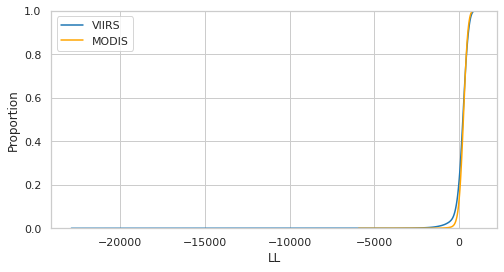

In [27]:
fig = plt.figure(figsize=(8,4))

ax = sns.ecdfplot(data=viirs_tbl, x='LL',label = 'VIIRS') 
sns.ecdfplot(data=modis_tbl, x='LL', color='orange', ax=ax, label = 'MODIS')
Cumulative Distribution 
plt.legend()
plt.show()

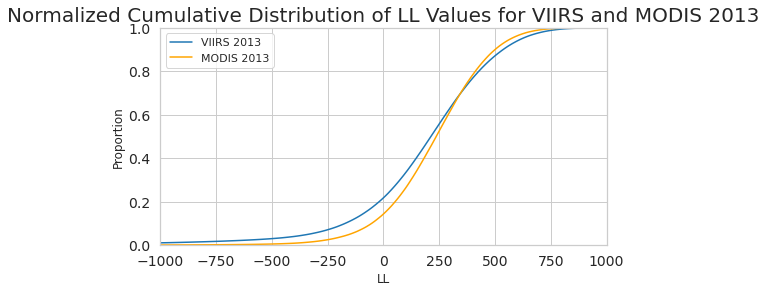

In [68]:
fig = plt.figure(figsize=(8,4))

ax = sns.ecdfplot(data=viirs_tbl13, x='LL',label = 'VIIRS 2013') 
sns.ecdfplot(data=modis_tbl13, x='LL', color='orange', ax=ax,label = 'MODIS 2013')
ax.set_xlim(-1000,1000)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.legend()
plt.title('Normalized Cumulative Distribution of LL Values for VIIRS and MODIS 2013',fontsize=20)
plt.savefig('cum')
plt.show()

### VIIRS DT vs LL

In [ ]:
viirs_tbl.Tmax - viirs_tbl.Tmin

In [ ]:
def fig_db_by_meanT(outfile):

    # Load db
    anom_db = pandas.read_hdf('../Analysis/MODIS_2010_100clear_48x48_log_probs.hdf')

    N10 = int(np.round(0.1*len(anom_db)))
    i10 = np.argsort(anom_db.log_likelihood.values)[0:N10]
    ih10 = np.argsort(anom_db.log_likelihood.values)[-N10:]

    # Months
    avgT = anom_db.mean_temperature.values

    # Bin em
    ibins = np.arange(0, 40, 5)
    H_all, bins = np.histogram(avgT, bins=ibins)
    bincentres = [(bins[i] + bins[i + 1]) / 2. for i in range(len(bins) - 1)]
    H_10, _ = np.histogram(avgT[i10], bins=ibins) # Outliers
    H_h10, _ = np.histogram(avgT[ih10], bins=ibins) # Inliers

    # Figure time
    fig = plt.figure(figsize=(7, 5))
    plt.clf()
    ax = plt.gca()

    for H, clr, cat in zip([H_all, H_10, H_h10], ['k', 'r', 'b'], ['All', 'Lowest 10%', 'Highest 10%']):
        plt.step(bincentres, H, where='mid', color=clr, label='{}'.format(cat))

    # Labels
    ax.set_ylabel(r'$N$')
    ax.set_xlabel(r'$<T>$ (C)')
    #ax.set_yscale('log')
    ax.minorticks_on()

    legend = plt.legend(loc='upper left', scatterpoints=1, borderpad=0.3,
                        handletextpad=0.3, fontsize='large', numpoints=1)

    # Layout and save
    # plt.tight_layout(pad=0.5, h_pad=0.5, w_pad=0.5)
    plt.savefig(outfile, dpi=300)
    plt.close()
    print('Wrote {:s}'.format(outfile))

## 2013

In [115]:
viirs_tbl = viirs_tbl13
modis_tbl = modis_tbl13

In [44]:
viirs_tbl.head()

,filename,row,col,lat,lon,clear_fraction,field_size,datetime,ex_filename,pp_file,pp_root,pp_idx,pp_type,mean_temperature,Tmin,Tmax,T90,T10,LL
0,s3://viirs/data/2013/001/20130101001000-OSPO-L...,1020,2592,-55.172756,-165.49512,0.048828,192,2013-01-01 00:10:00,s3://viirs/Extractions/VIIRS_2013_95clear_192x...,s3://viirs/PreProc/VIIRS_2013_95clear_192x192_...,viirs_std,622687,0,6.804148,4.529999,7.700012,7.190002,6.470001,300.294861
1,s3://viirs/data/2013/001/20130101001000-OSPO-L...,1055,2561,-54.937588,-165.16225,0.048991,192,2013-01-01 00:10:00,s3://viirs/Extractions/VIIRS_2013_95clear_192x...,s3://viirs/PreProc/VIIRS_2013_95clear_192x192_...,viirs_std,581597,0,6.737536,4.529999,7.459991,7.079987,6.242831,300.315857
2,s3://viirs/data/2013/001/20130101001000-OSPO-L...,1104,2592,-54.629894,-165.56808,0.000190,192,2013-01-01 00:10:00,s3://viirs/Extractions/VIIRS_2013_95clear_192x...,s3://viirs/PreProc/VIIRS_2013_95clear_192x192_...,viirs_std,371103,0,6.957690,4.529999,7.730011,7.239990,6.720001,454.317627
3,s3://viirs/data/2013/001/20130101001000-OSPO-L...,1125,2540,-54.478348,-164.99258,0.049723,192,2013-01-01 00:10:00,s3://viirs/Extractions/VIIRS_2013_95clear_192x...,s3://viirs/PreProc/VIIRS_2013_95clear_192x192_...,viirs_std,145421,0,6.905102,4.950012,8.160004,7.359985,6.410004,305.489746
4,s3://viirs/data/2013/001/20130101001000-OSPO-L...,1154,2543,-54.291890,-165.05530,0.049642,192,2013-01-01 00:10:00,s3://viirs/Extractions/VIIRS_2013_95clear_192x...,s3://viirs/PreProc/VIIRS_2013_95clear_192x192_...,viirs_std,1108162,0,7.107228,5.559998,9.049988,7.679993,6.559998,274.880371


In [45]:
modis_tbl.head()

,lat,lon,col,datetime,LL,row,clear_fraction,mean_temperature,Tmin,Tmax,T90,T10,filename,UID,pp_file,pp_root,field_size,pp_type,pp_idx
7276284,-23.520683,95.750770,485,2013-10-02 18:50:00,-52.727173,1170,0.049438,20.781815,18.490000,22.260000,21.244999,20.244999,AQUA_MODIS.20131002T185008.L2.SST.nc,138066479327575077,s3://modis-l2/PreProc/MODIS_R2019_2013_95clear...,standard,128,0,0
7276285,16.851051,-102.057250,837,2013-12-14 08:40:00,283.585815,1040,0.013916,29.703894,28.039999,30.490000,30.074999,29.195000,AQUA_MODIS.20131214T084008.L2.SST.nc,138710685117794275,s3://modis-l2/PreProc/MODIS_R2019_2013_95clear...,standard,128,0,1
7276286,-35.825134,63.294304,773,2013-09-19 21:05:00,517.703552,368,0.034302,15.086960,14.445000,15.745000,15.309999,14.785000,AQUA_MODIS.20130919T210509.L2.SST.nc,137954174924329430,s3://modis-l2/PreProc/MODIS_R2019_2013_95clear...,standard,128,0,2
7276287,16.329021,58.524254,837,2013-04-09 22:00:00,524.822571,112,0.002136,26.719688,25.205000,27.369999,27.000000,26.439999,AQUA_MODIS.20130409T220009.L2.SST.nc,1365106329023852425,s3://modis-l2/PreProc/MODIS_R2019_2013_95clear...,standard,128,0,3
7276288,-32.495373,34.305447,599,2013-11-04 22:55:00,21.168213,643,0.049377,19.084999,17.580000,21.109999,20.395000,18.440001,AQUA_MODIS.20131104T225509.L2.SST.nc,138357504621430545,s3://modis-l2/PreProc/MODIS_R2019_2013_95clear...,standard,128,0,4


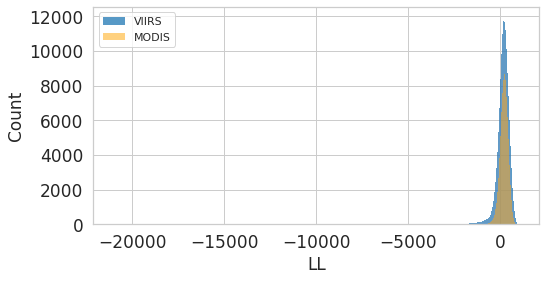

In [46]:
fig = plt.figure(figsize=(8,4))

ax = sns.histplot(data=viirs_tbl, x='LL',alpha=0.75, stat='count',label = 'VIIRS')
ax = sns.histplot(data=modis_tbl, x='LL',color='orange',alpha=0.5, stat='count',label = 'MODIS')
plotting.set_fontsize(ax, 17.)
plt.legend()
plt.show()

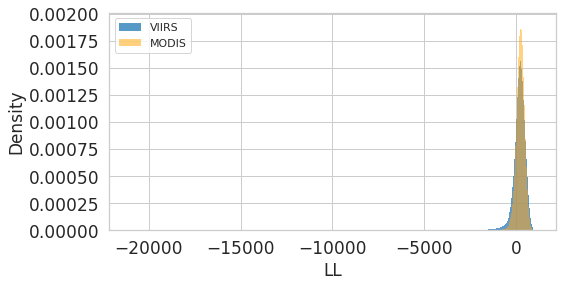

In [52]:
fig = plt.figure(figsize=(8,4))

ax = sns.histplot(data=viirs_tbl, x='LL',alpha=0.75, stat='density',label = 'VIIRS')
ax = sns.histplot(data=modis_tbl, x='LL',color='orange',alpha=0.5, stat='density',label = 'MODIS')
plotting.set_fontsize(ax, 17.)
plt.legend()
plt.show()

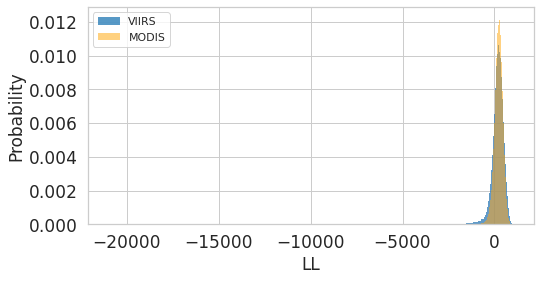

In [48]:
fig = plt.figure(figsize=(8,4))

ax = sns.histplot(data=viirs_tbl, x='LL',alpha=0.75, stat='probability',label = 'VIIRS')
ax = sns.histplot(data=modis_tbl, x='LL',color='orange',alpha=0.5, stat='probability',label = 'MODIS')
plotting.set_fontsize(ax, 17.)
plt.legend()
plt.show()

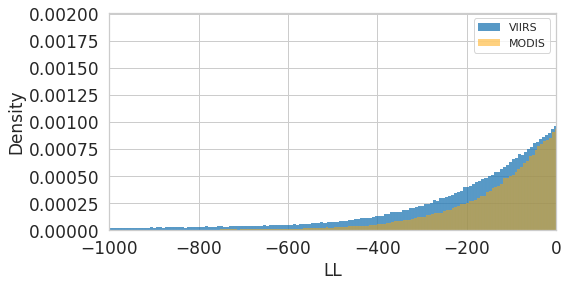

In [49]:
fig = plt.figure(figsize=(8,4))

ax = sns.histplot(data=viirs_tbl, x='LL',alpha=0.75, stat='density',label = 'VIIRS')
ax = sns.histplot(data=modis_tbl, x='LL',color='orange',alpha=0.5, stat='density',label = 'MODIS')
plotting.set_fontsize(ax, 17.)
plt.xlim(-1000,0)
plt.legend()
plt.show()

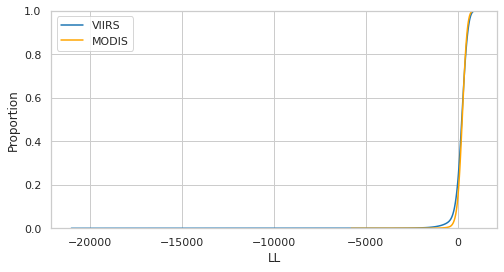

In [50]:
fig = plt.figure(figsize=(8,4))

ax = sns.ecdfplot(data=viirs_tbl, x='LL',label = 'VIIRS') 
sns.ecdfplot(data=modis_tbl, x='LL', color='orange', ax=ax, label = 'MODIS')
plt.legend()
plt.show()

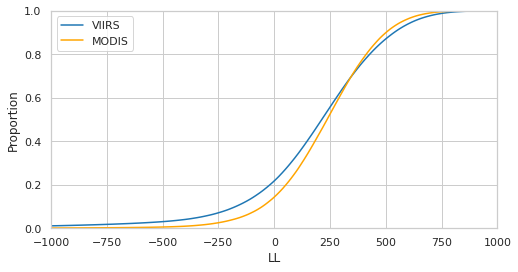

In [51]:
fig = plt.figure(figsize=(8,4))

ax = sns.ecdfplot(data=viirs_tbl, x='LL',label = 'VIIRS') 
sns.ecdfplot(data=modis_tbl, x='LL', color='orange', ax=ax,label = 'MODIS')
ax.set_xlim(-1000,1000)
plt.legend()
plt.show()

In [124]:
c13 = {'LL': viirs_tbl.LL - modis_tbl.LL
        }

df = pd.DataFrame(c13, columns = ['LL'])

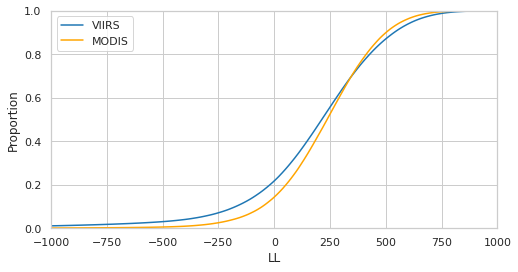

In [121]:
fig = plt.figure(figsize=(8,4))

ax = sns.ecdfplot(data=viirs_tbl, x='LL',label = 'VIIRS') 
sns.ecdfplot(data=modis_tbl, x='LL', color='orange', ax=ax,label = 'MODIS')
ax.set_xlim(-1000,1000)
plt.legend()
plt.show()

## 2014

In [53]:
viirs_tbl = viirs_tbl14
modis_tbl = modis_tbl14

In [55]:
viirs_tbl.head()

,filename,row,col,lat,lon,clear_fraction,field_size,datetime,ex_filename,pp_file,pp_root,pp_idx,pp_type,mean_temperature,Tmin,Tmax,T90,T10,LL
0,s3://viirs/data/2014/001/20140101000000-OSPO-L...,418,2458,44.377880,-178.670150,0.049967,192,2014-01-01 00:00:00,s3://viirs/Extractions/VIIRS_2014_95clear_192x...,s3://viirs/PreProc/VIIRS_2014_95clear_192x192_...,viirs_std,1005910,0,8.583900,7.079987,9.829987,9.119995,7.970001,221.975891
1,s3://viirs/data/2014/001/20140101000000-OSPO-L...,432,2496,44.372460,-179.058010,0.037272,192,2014-01-01 00:00:00,s3://viirs/Extractions/VIIRS_2014_95clear_192x...,s3://viirs/PreProc/VIIRS_2014_95clear_192x192_...,viirs_std,545007,0,8.625418,7.769989,9.829987,9.109985,8.200012,198.678406
2,s3://viirs/data/2014/001/20140101000000-OSPO-L...,508,2487,44.853683,-179.272670,0.049967,192,2014-01-01 00:00:00,s3://viirs/Extractions/VIIRS_2014_95clear_192x...,s3://viirs/PreProc/VIIRS_2014_95clear_192x192_...,viirs_std,832786,0,8.378136,7.260010,9.440002,8.850006,7.950012,194.382202
3,s3://viirs/data/2014/001/20140101000000-OSPO-L...,515,2496,44.876762,-179.369810,0.049805,192,2014-01-01 00:00:00,s3://viirs/Extractions/VIIRS_2014_95clear_192x...,s3://viirs/PreProc/VIIRS_2014_95clear_192x192_...,viirs_std,167327,0,8.374814,7.260010,9.440002,8.889984,7.929993,200.585999
4,s3://viirs/data/2014/001/20140101004000-OSPO-L...,3263,10,-24.942970,-7.973459,0.049588,192,2014-01-01 00:40:00,s3://viirs/Extractions/VIIRS_2014_95clear_192x...,s3://viirs/PreProc/VIIRS_2014_95clear_192x192_...,viirs_std,916782,0,23.500118,21.739990,24.899994,23.910004,23.089996,233.924011


In [54]:
modis_tbl.head()

,lat,lon,col,datetime,LL,row,clear_fraction,mean_temperature,Tmin,Tmax,T90,T10,filename,UID,pp_file,pp_root,field_size,pp_type,pp_idx
7990420,-41.828330,-129.650300,677,2014-12-09 09:45:00,362.854187,1171,0.048401,13.763470,12.405000,14.980000,14.570000,13.134999,AQUA_MODIS.20141209T094508.L2.SST.nc,14184817175034970,s3://modis-l2/PreProc/MODIS_R2019_2014_95clear...,standard,128,0,0
7990421,41.241726,7.066357,357,2014-08-01 01:20:00,285.063721,1232,0.002808,21.836887,20.555000,23.309999,22.379999,21.375000,AQUA_MODIS.20140801T012000.L2.SST.nc,1406131241718706636,s3://modis-l2/PreProc/MODIS_R2019_2014_95clear...,standard,128,0,1
7990422,-51.057156,-49.577656,225,2014-03-15 03:45:00,-74.377380,635,0.049988,5.976967,4.405000,7.910000,6.625000,5.375000,AQUA_MODIS.20140315T034509.L2.SST.nc,139438942813042234,s3://modis-l2/PreProc/MODIS_R2019_2014_95clear...,standard,128,0,2
7990423,12.878537,50.423885,869,2014-07-04 22:30:00,54.418396,624,0.020691,29.640112,26.369999,31.160000,30.404999,28.752626,AQUA_MODIS.20140704T223008.L2.SST.nc,1404102878523042388,s3://modis-l2/PreProc/MODIS_R2019_2014_95clear...,standard,128,0,3
7990424,-45.496270,-135.271260,581,2014-02-06 10:00:00,487.709839,635,0.046082,13.831466,13.059999,14.804999,14.320000,13.465000,AQUA_MODIS.20140206T100009.L2.SST.nc,13914450374472874,s3://modis-l2/PreProc/MODIS_R2019_2014_95clear...,standard,128,0,4


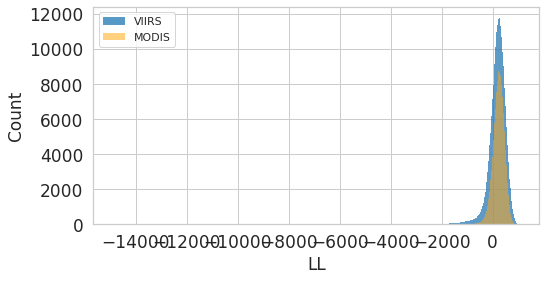

In [56]:
fig = plt.figure(figsize=(8,4))

ax = sns.histplot(data=viirs_tbl, x='LL',alpha=0.75, stat='count',label = 'VIIRS')
ax = sns.histplot(data=modis_tbl, x='LL',color='orange',alpha=0.5, stat='count',label = 'MODIS')
plotting.set_fontsize(ax, 17.)
plt.legend()
plt.show()

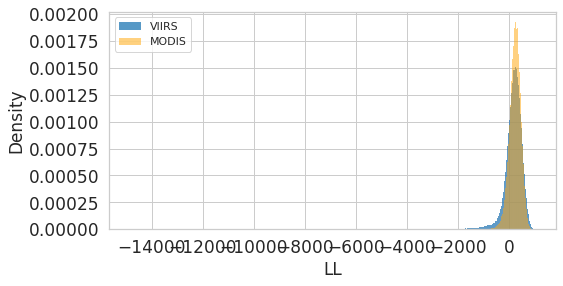

In [57]:
fig = plt.figure(figsize=(8,4))

ax = sns.histplot(data=viirs_tbl, x='LL',alpha=0.75, stat='density',label = 'VIIRS')
ax = sns.histplot(data=modis_tbl, x='LL',color='orange',alpha=0.5, stat='density',label = 'MODIS')
plotting.set_fontsize(ax, 17.)
plt.legend()
plt.show()

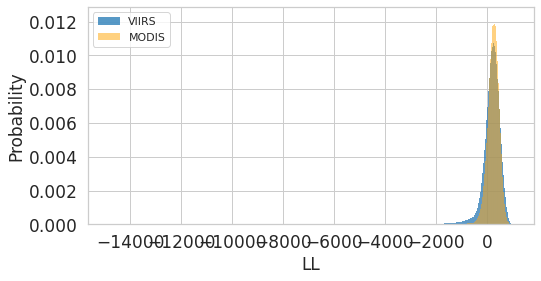

In [58]:
fig = plt.figure(figsize=(8,4))

ax = sns.histplot(data=viirs_tbl, x='LL',alpha=0.75, stat='probability',label = 'VIIRS')
ax = sns.histplot(data=modis_tbl, x='LL',color='orange',alpha=0.5, stat='probability',label = 'MODIS')
plotting.set_fontsize(ax, 17.)
plt.legend()
plt.show()


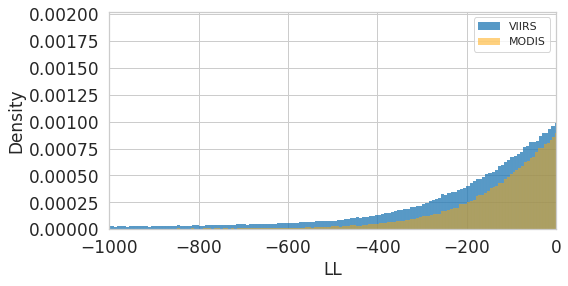

In [59]:

fig = plt.figure(figsize=(8,4))

ax = sns.histplot(data=viirs_tbl, x='LL',alpha=0.75, stat='density',label = 'VIIRS')
ax = sns.histplot(data=modis_tbl, x='LL',color='orange',alpha=0.5, stat='density',label = 'MODIS')
plotting.set_fontsize(ax, 17.)
plt.xlim(-1000,0)
plt.legend()
plt.show()


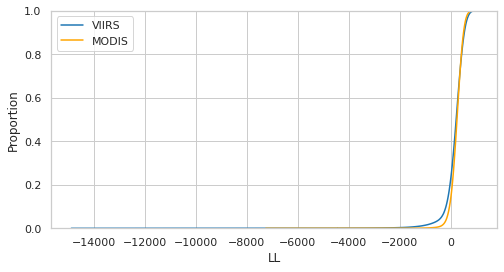

In [60]:
fig = plt.figure(figsize=(8,4))

ax = sns.ecdfplot(data=viirs_tbl, x='LL',label = 'VIIRS') 
sns.ecdfplot(data=modis_tbl, x='LL', color='orange', ax=ax, label = 'MODIS')
plt.legend()
plt.show()



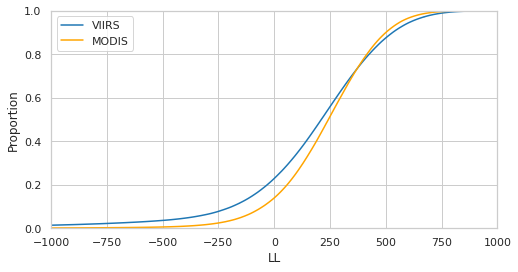

In [61]:

fig = plt.figure(figsize=(8,4))

ax = sns.ecdfplot(data=viirs_tbl, x='LL',label = 'VIIRS') 
sns.ecdfplot(data=modis_tbl, x='LL', color='orange', ax=ax,label = 'MODIS')
ax.set_xlim(-1000,1000)
plt.legend()
plt.show()



## 2015

In [62]:
viirs_tbl = viirs_tbl15
modis_tbl = modis_tbl15

In [63]:
viirs_tbl.head()

,filename,row,col,lat,lon,clear_fraction,field_size,datetime,ex_filename,pp_file,pp_root,pp_idx,pp_type,mean_temperature,Tmin,Tmax,T90,T10,LL
0,s3://viirs/data/2015/001/20150101000000-OSPO-L...,5136,1511,-37.312695,14.089271,0.049995,192,2015-01-01 00:00:00,s3://viirs/Extractions/VIIRS_2015_95clear_192x...,s3://viirs/PreProc/VIIRS_2015_95clear_192x192_...,viirs_std,883277,0,18.610573,16.220001,21.559998,21.070007,17.630005,-343.813477
1,s3://viirs/data/2015/001/20150101000000-OSPO-L...,5136,1536,-37.346410,14.307197,0.038656,192,2015-01-01 00:00:00,s3://viirs/Extractions/VIIRS_2015_95clear_192x...,s3://viirs/PreProc/VIIRS_2015_95clear_192x192_...,viirs_std,190913,0,18.898754,16.220001,21.609985,21.190002,17.700012,-507.490906
2,s3://viirs/data/2015/001/20150101003000-OSPO-L...,2640,2374,-52.999348,-166.148280,0.048828,192,2015-01-01 00:30:00,s3://viirs/Extractions/VIIRS_2015_95clear_192x...,s3://viirs/PreProc/VIIRS_2015_95clear_192x192_...,viirs_std,1007196,0,9.424915,7.299988,10.609985,10.124682,8.950012,124.137878
3,s3://viirs/data/2015/001/20150101003000-OSPO-L...,2640,2400,-53.021122,-166.596910,0.034451,192,2015-01-01 00:30:00,s3://viirs/Extractions/VIIRS_2015_95clear_192x...,s3://viirs/PreProc/VIIRS_2015_95clear_192x192_...,viirs_std,1037210,0,9.395357,7.299988,10.609985,9.929993,8.959991,239.659180
4,s3://viirs/data/2015/001/20150101003000-OSPO-L...,3121,2479,-49.962010,-168.452180,0.049995,192,2015-01-01 00:30:00,s3://viirs/Extractions/VIIRS_2015_95clear_192x...,s3://viirs/PreProc/VIIRS_2015_95clear_192x192_...,viirs_std,394514,0,11.648553,9.299988,12.559998,12.130005,10.660004,95.135010


In [64]:
modis_tbl.head()

,lat,lon,col,datetime,LL,row,clear_fraction,mean_temperature,Tmin,Tmax,T90,T10,filename,UID,pp_file,pp_root,field_size,pp_type,pp_idx
8710820,-13.106840,125.467620,581,2015-11-18 17:00:00,206.700745,1840,0.005981,29.788914,27.615,30.974998,30.355000,28.684999,AQUA_MODIS.20151118T170010.L2.SST.nc,144776893230546762,s3://modis-l2/PreProc/MODIS_R2019_2015_95clear...,standard,128,0,0
8710821,-29.291500,-3.064824,241,2015-10-20 01:10:00,303.490479,544,0.049744,18.210735,15.815,19.449999,18.525000,17.830000,AQUA_MODIS.20151020T011010.L2.SST.nc,144560708517693518,s3://modis-l2/PreProc/MODIS_R2019_2015_95clear...,standard,128,0,1
8710822,-40.196545,-48.703423,805,2015-05-29 04:30:00,-839.676697,1081,0.049927,14.559570,12.210,19.934999,17.041134,13.045000,AQUA_MODIS.20150529T043009.L2.SST.nc,143249803513129658,s3://modis-l2/PreProc/MODIS_R2019_2015_95clear...,standard,128,0,2
8710823,-9.751677,128.624420,357,2015-09-10 16:45:00,452.401245,112,0.000000,26.690514,25.840,27.535000,27.055000,26.369999,AQUA_MODIS.20150910T164509.L2.SST.nc,144180248330862442,s3://modis-l2/PreProc/MODIS_R2019_2015_95clear...,standard,128,0,3
8710824,12.839568,52.170560,741,2015-07-09 22:15:00,-78.794922,1774,0.048889,26.420010,22.945,28.644999,27.629999,25.105000,AQUA_MODIS.20150709T221500.L2.SST.nc,1436102839623217056,s3://modis-l2/PreProc/MODIS_R2019_2015_95clear...,standard,128,0,4


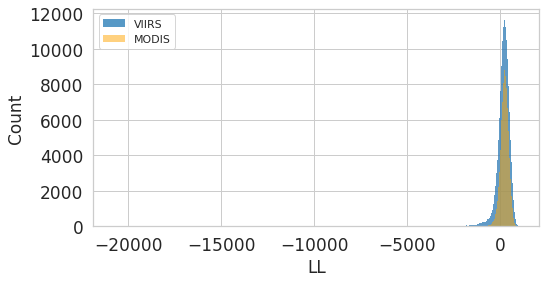

In [65]:
fig = plt.figure(figsize=(8,4))

ax = sns.histplot(data=viirs_tbl, x='LL',alpha=0.75, stat='count',label = 'VIIRS')
ax = sns.histplot(data=modis_tbl, x='LL',color='orange',alpha=0.5, stat='count',label = 'MODIS')
plotting.set_fontsize(ax, 17.)
plt.legend()
plt.show()


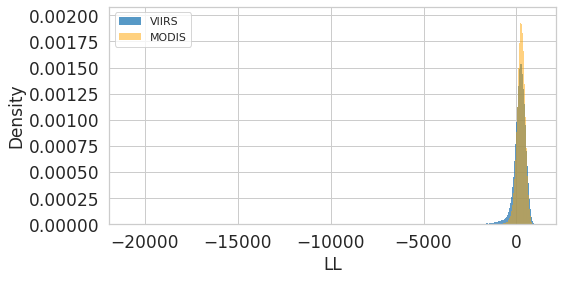

In [66]:

fig = plt.figure(figsize=(8,4))

ax = sns.histplot(data=viirs_tbl, x='LL',alpha=0.75, stat='density',label = 'VIIRS')
ax = sns.histplot(data=modis_tbl, x='LL',color='orange',alpha=0.5, stat='density',label = 'MODIS')
plotting.set_fontsize(ax, 17.)
plt.legend()
plt.show()


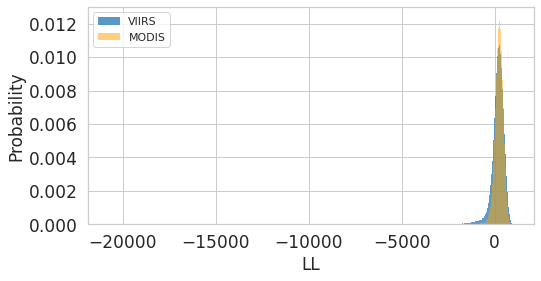

In [67]:
fig = plt.figure(figsize=(8,4))

ax = sns.histplot(data=viirs_tbl, x='LL',alpha=0.75, stat='probability',label = 'VIIRS')
ax = sns.histplot(data=modis_tbl, x='LL',color='orange',alpha=0.5, stat='probability',label = 'MODIS')
plotting.set_fontsize(ax, 17.)
plt.legend()
plt.show()


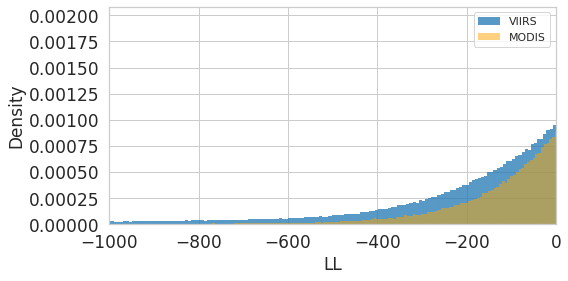

In [68]:

fig = plt.figure(figsize=(8,4))

ax = sns.histplot(data=viirs_tbl, x='LL',alpha=0.75, stat='density',label = 'VIIRS')
ax = sns.histplot(data=modis_tbl, x='LL',color='orange',alpha=0.5, stat='density',label = 'MODIS')
plotting.set_fontsize(ax, 17.)
plt.xlim(-1000,0)
plt.legend()
plt.show()


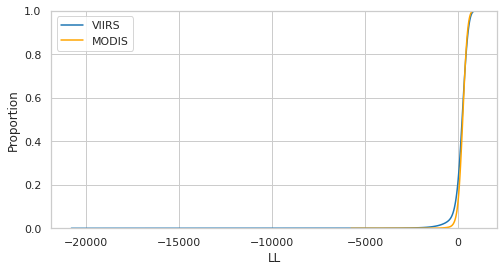

In [69]:
fig = plt.figure(figsize=(8,4))

ax = sns.ecdfplot(data=viirs_tbl, x='LL',label = 'VIIRS') 
sns.ecdfplot(data=modis_tbl, x='LL', color='orange', ax=ax, label = 'MODIS')
plt.legend()
plt.show()


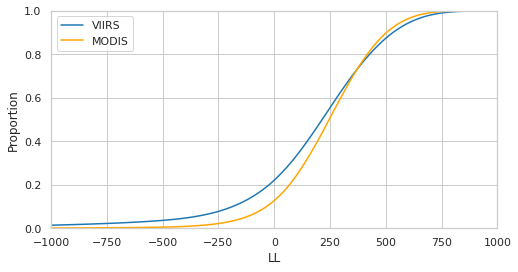

In [70]:

fig = plt.figure(figsize=(8,4))

ax = sns.ecdfplot(data=viirs_tbl, x='LL',label = 'VIIRS') 
sns.ecdfplot(data=modis_tbl, x='LL', color='orange', ax=ax,label = 'MODIS')
ax.set_xlim(-1000,1000)
plt.legend()
plt.show()


## 2016

In [71]:
viirs_tbl = viirs_tbl16
modis_tbl = modis_tbl16

In [72]:
viirs_tbl.head()

,filename,row,col,lat,lon,clear_fraction,field_size,datetime,ex_filename,pp_file,pp_root,pp_idx,pp_type,mean_temperature,Tmin,Tmax,T90,T10,LL
0,s3://viirs/data/2016/001/20160101000000-OSPO-L...,2448,768,18.072535,-156.15631,0.026910,192,2016-01-01,s3://viirs/Extractions/VIIRS_2016_95clear_192x...,s3://viirs/PreProc/VIIRS_2016_95clear_192x192_...,viirs_std,947615,0,26.094532,25.070007,26.619995,26.239990,25.950012,763.726074
1,s3://viirs/data/2016/001/20160101000000-OSPO-L...,2451,672,18.195986,-155.28226,0.048340,192,2016-01-01,s3://viirs/Extractions/VIIRS_2016_95clear_192x...,s3://viirs/PreProc/VIIRS_2016_95clear_192x192_...,viirs_std,782004,0,25.967422,24.649994,26.619995,26.179993,25.730011,564.171509
2,s3://viirs/data/2016/001/20160101000000-OSPO-L...,2460,576,18.369888,-154.27640,0.048557,192,2016-01-01,s3://viirs/Extractions/VIIRS_2016_95clear_192x...,s3://viirs/PreProc/VIIRS_2016_95clear_192x192_...,viirs_std,493599,0,25.815350,23.679993,26.529999,26.000000,25.619509,542.903137
3,s3://viirs/data/2016/001/20160101000000-OSPO-L...,2471,550,18.475002,-153.98338,0.049995,192,2016-01-01,s3://viirs/Extractions/VIIRS_2016_95clear_192x...,s3://viirs/PreProc/VIIRS_2016_95clear_192x192_...,viirs_std,314846,0,25.763845,23.679993,26.529999,25.980011,25.549988,463.872986
4,s3://viirs/data/2016/001/20160101000000-OSPO-L...,3031,1344,21.231320,-161.92795,0.049967,192,2016-01-01,s3://viirs/Extractions/VIIRS_2016_95clear_192x...,s3://viirs/PreProc/VIIRS_2016_95clear_192x192_...,viirs_std,60432,0,25.432808,24.049988,26.410004,26.160004,24.869995,294.800842


In [73]:
modis_tbl.head()

,lat,lon,col,datetime,LL,row,clear_fraction,mean_temperature,Tmin,Tmax,T90,T10,filename,UID,pp_file,pp_root,field_size,pp_type,pp_idx
9420175,21.657940,61.305350,837,2016-04-26 21:50:00,277.971558,1026,0.048035,27.694717,26.699999,28.584999,28.039999,27.344999,AQUA_MODIS.20160426T215010.L2.SST.nc,1461111657924130535,s3://modis-l2/PreProc/MODIS_R2019_2016_95clear...,standard,128,0,0
9420176,-36.842075,57.760410,458,2016-01-06 21:10:00,280.269287,929,0.049866,20.040504,18.684999,21.475000,20.545000,19.670000,AQUA_MODIS.20160106T211010.L2.SST.nc,145253157923776041,s3://modis-l2/PreProc/MODIS_R2019_2016_95clear...,standard,128,0,1
9420177,-63.683680,-104.217310,677,2016-06-14 21:30:00,354.518311,1554,0.049866,1.205315,-0.470000,2.110000,1.650000,0.760000,AQUA_MODIS.20160614T213010.L2.SST.nc,14652631637578269,s3://modis-l2/PreProc/MODIS_R2019_2016_95clear...,standard,128,0,2
9420178,-30.774736,113.079544,408,2016-02-02 17:30:00,146.019653,1793,0.048706,22.014933,19.920000,23.350000,22.799999,21.174999,AQUA_MODIS.20160202T173010.L2.SST.nc,145459225329307954,s3://modis-l2/PreProc/MODIS_R2019_2016_95clear...,standard,128,0,3
9420179,-17.836770,112.417984,325,2016-03-03 17:40:00,19.646912,1424,0.014465,28.799305,25.820000,30.535000,29.434999,28.000000,AQUA_MODIS.20160303T174010.L2.SST.nc,145772163229241798,s3://modis-l2/PreProc/MODIS_R2019_2016_95clear...,standard,128,0,4


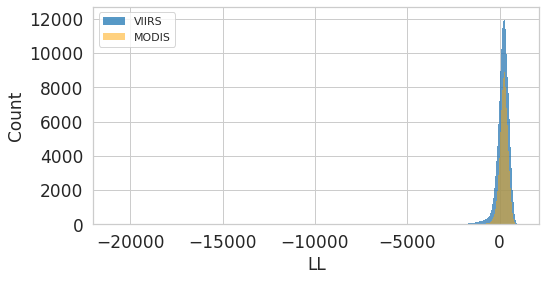

In [74]:
fig = plt.figure(figsize=(8,4))

ax = sns.histplot(data=viirs_tbl, x='LL',alpha=0.75, stat='count',label = 'VIIRS')
ax = sns.histplot(data=modis_tbl, x='LL',color='orange',alpha=0.5, stat='count',label = 'MODIS')
plotting.set_fontsize(ax, 17.)
plt.legend()
plt.show()


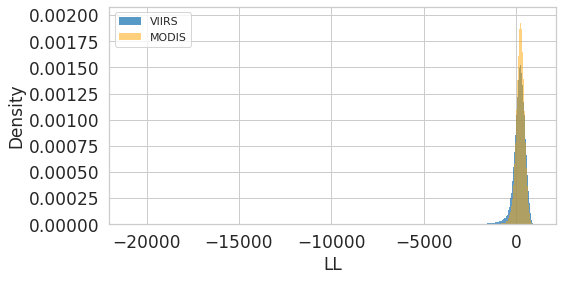

In [75]:
fig = plt.figure(figsize=(8,4))

ax = sns.histplot(data=viirs_tbl, x='LL',alpha=0.75, stat='density',label = 'VIIRS')
ax = sns.histplot(data=modis_tbl, x='LL',color='orange',alpha=0.5, stat='density',label = 'MODIS')
plotting.set_fontsize(ax, 17.)
plt.legend()
plt.show()


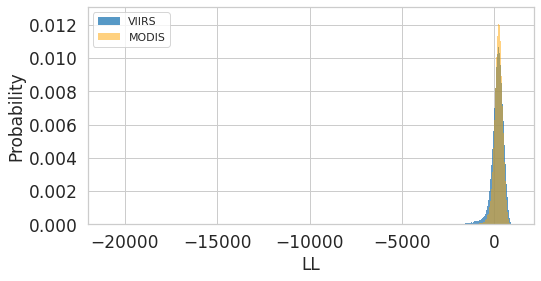

In [76]:

fig = plt.figure(figsize=(8,4))

ax = sns.histplot(data=viirs_tbl, x='LL',alpha=0.75, stat='probability',label = 'VIIRS')
ax = sns.histplot(data=modis_tbl, x='LL',color='orange',alpha=0.5, stat='probability',label = 'MODIS')
plotting.set_fontsize(ax, 17.)
plt.legend()
plt.show()


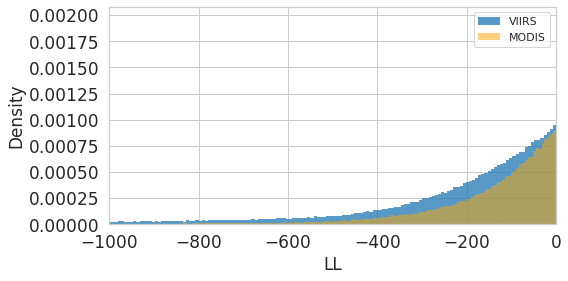

In [77]:
fig = plt.figure(figsize=(8,4))

ax = sns.histplot(data=viirs_tbl, x='LL',alpha=0.75, stat='density',label = 'VIIRS')
ax = sns.histplot(data=modis_tbl, x='LL',color='orange',alpha=0.5, stat='density',label = 'MODIS')
plotting.set_fontsize(ax, 17.)
plt.xlim(-1000,0)
plt.legend()
plt.show()


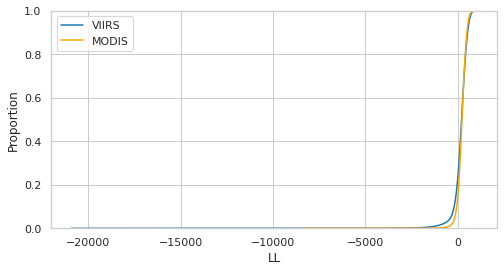

In [78]:
fig = plt.figure(figsize=(8,4))

ax = sns.ecdfplot(data=viirs_tbl, x='LL',label = 'VIIRS') 
sns.ecdfplot(data=modis_tbl, x='LL', color='orange', ax=ax, label = 'MODIS')
plt.legend()
plt.show()


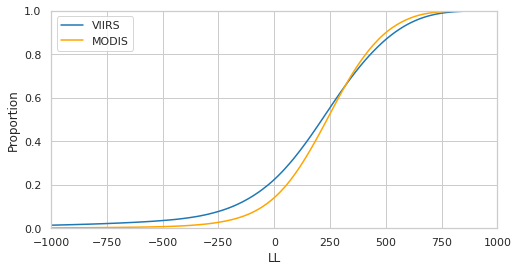

In [79]:
fig = plt.figure(figsize=(8,4))

ax = sns.ecdfplot(data=viirs_tbl, x='LL',label = 'VIIRS') 
sns.ecdfplot(data=modis_tbl, x='LL', color='orange', ax=ax,label = 'MODIS')
ax.set_xlim(-1000,1000)
plt.legend()
plt.show()


## 2017

In [80]:
viirs_tbl = viirs_tbl17
modis_tbl = modis_tbl17

In [81]:

viirs_tbl.head()

,filename,row,col,lat,lon,clear_fraction,field_size,datetime,ex_filename,pp_file,pp_root,pp_idx,pp_type,mean_temperature,Tmin,Tmax,T90,T10,LL
0,s3://viirs/data/2017/001/20170101002000-OSPO-L...,253,864,-53.484930,-142.80884,0.049208,192,2017-01-01 00:20:00,s3://viirs/Extractions/VIIRS_2017_95clear_192x...,s3://viirs/PreProc/VIIRS_2017_95clear_192x192_...,viirs_std,1037981,0,9.191571,7.250000,10.989990,10.010010,8.540009,113.713623
1,s3://viirs/data/2017/001/20170101002000-OSPO-L...,287,811,-53.124584,-142.33246,0.049750,192,2017-01-01 00:20:00,s3://viirs/Extractions/VIIRS_2017_95clear_192x...,s3://viirs/PreProc/VIIRS_2017_95clear_192x192_...,viirs_std,289660,0,9.699532,8.339996,11.339996,10.559998,8.750000,173.058105
2,s3://viirs/data/2017/001/20170101002000-OSPO-L...,336,864,-52.983170,-143.18716,0.010878,192,2017-01-01 00:20:00,s3://viirs/Extractions/VIIRS_2017_95clear_192x...,s3://viirs/PreProc/VIIRS_2017_95clear_192x192_...,viirs_std,1012333,0,9.267763,8.160004,10.989990,10.209991,8.589996,229.563232
3,s3://viirs/data/2017/001/20170101002000-OSPO-L...,383,789,-52.479202,-142.50323,0.049533,192,2017-01-01 00:20:00,s3://viirs/Extractions/VIIRS_2017_95clear_192x...,s3://viirs/PreProc/VIIRS_2017_95clear_192x192_...,viirs_std,1094893,0,10.072083,8.179993,11.609985,11.119995,8.820007,58.421265
4,s3://viirs/data/2017/001/20170101002000-OSPO-L...,432,864,-52.401833,-143.61517,0.019368,192,2017-01-01 00:20:00,s3://viirs/Extractions/VIIRS_2017_95clear_192x...,s3://viirs/PreProc/VIIRS_2017_95clear_192x192_...,viirs_std,289371,0,9.664635,8.149994,11.089996,10.450012,8.679993,136.728394


In [82]:

modis_tbl.head()

,lat,lon,col,datetime,LL,row,clear_fraction,mean_temperature,Tmin,Tmax,T90,T10,filename,UID,pp_file,pp_root,field_size,pp_type,pp_idx
10136616,0.770195,45.703106,485,2017-01-10 22:25:00,594.679565,1264,0.000000,26.404573,25.734999,27.199999,26.719999,26.135000,AQUA_MODIS.20170110T222510.L2.SST.nc,148490770222570311,s3://modis-l2/PreProc/MODIS_R2019_2017_95clear...,standard,128,0,0
10136617,-32.801060,129.810230,709,2017-06-13 16:35:00,546.393677,1648,0.000000,18.420433,17.434999,19.010000,18.690001,18.090000,AQUA_MODIS.20170613T163511.L2.SST.nc,149757198930981023,s3://modis-l2/PreProc/MODIS_R2019_2017_95clear...,standard,128,0,1
10136618,21.145754,64.003426,485,2017-01-11 21:25:00,505.038269,752,0.000000,25.241367,24.455000,26.014999,25.490000,25.000000,AQUA_MODIS.20170111T212511.L2.SST.nc,1484111145824400343,s3://modis-l2/PreProc/MODIS_R2019_2017_95clear...,standard,128,0,2
10136619,14.709352,-100.298810,581,2017-12-04 08:20:00,581.701904,1616,0.000000,29.883064,29.090000,30.519999,30.099998,29.674999,AQUA_MODIS.20171204T082001.L2.SST.nc,151210470947970119,s3://modis-l2/PreProc/MODIS_R2019_2017_95clear...,standard,128,0,3
10136620,34.279564,-122.181760,197,2017-12-22 09:45:00,17.933533,144,0.000305,14.698988,13.355000,16.225000,15.455000,13.960000,AQUA_MODIS.20171222T094500.L2.SST.nc,151312427965781824,s3://modis-l2/PreProc/MODIS_R2019_2017_95clear...,standard,128,0,4


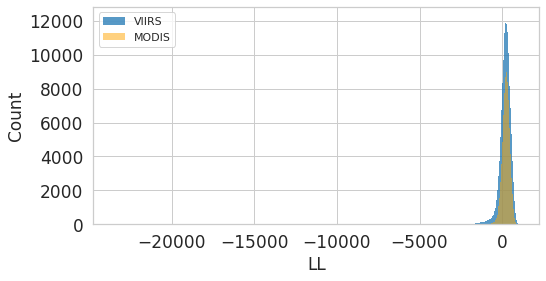

In [83]:
fig = plt.figure(figsize=(8,4))

ax = sns.histplot(data=viirs_tbl, x='LL',alpha=0.75, stat='count',label = 'VIIRS')
ax = sns.histplot(data=modis_tbl, x='LL',color='orange',alpha=0.5, stat='count',label = 'MODIS')
plotting.set_fontsize(ax, 17.)
plt.legend()
plt.show()


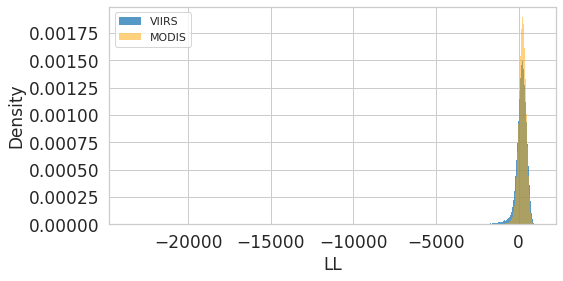

In [84]:
fig = plt.figure(figsize=(8,4))

ax = sns.histplot(data=viirs_tbl, x='LL',alpha=0.75, stat='density',label = 'VIIRS')
ax = sns.histplot(data=modis_tbl, x='LL',color='orange',alpha=0.5, stat='density',label = 'MODIS')
plotting.set_fontsize(ax, 17.)
plt.legend()
plt.show()


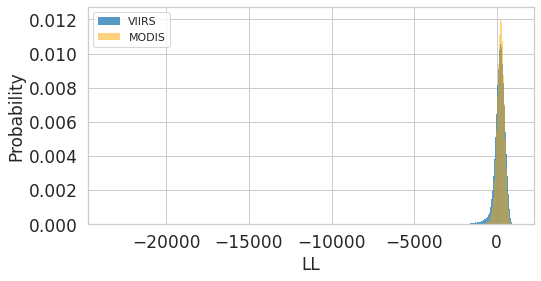

In [85]:
fig = plt.figure(figsize=(8,4))

ax = sns.histplot(data=viirs_tbl, x='LL',alpha=0.75, stat='probability',label = 'VIIRS')
ax = sns.histplot(data=modis_tbl, x='LL',color='orange',alpha=0.5, stat='probability',label = 'MODIS')
plotting.set_fontsize(ax, 17.)
plt.legend()
plt.show()


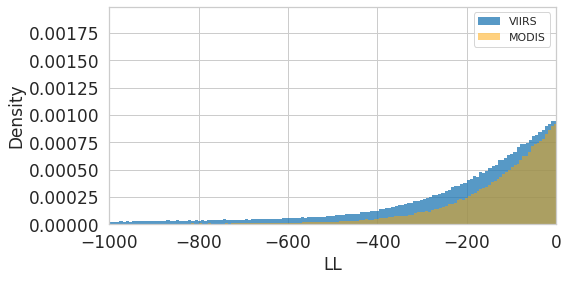

In [86]:
fig = plt.figure(figsize=(8,4))

ax = sns.histplot(data=viirs_tbl, x='LL',alpha=0.75, stat='density',label = 'VIIRS')
ax = sns.histplot(data=modis_tbl, x='LL',color='orange',alpha=0.5, stat='density',label = 'MODIS')
plotting.set_fontsize(ax, 17.)
plt.xlim(-1000,0)
plt.legend()
plt.show()


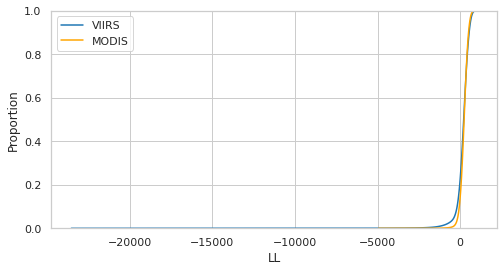

In [87]:
fig = plt.figure(figsize=(8,4))

ax = sns.ecdfplot(data=viirs_tbl, x='LL',label = 'VIIRS') 
sns.ecdfplot(data=modis_tbl, x='LL', color='orange', ax=ax, label = 'MODIS')
plt.legend()
plt.show()


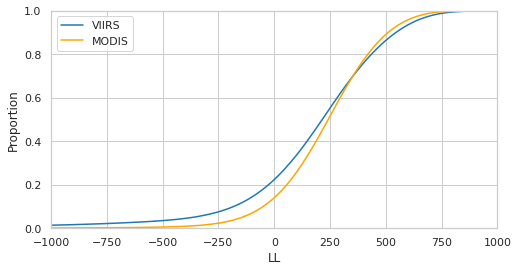

In [88]:
fig = plt.figure(figsize=(8,4))

ax = sns.ecdfplot(data=viirs_tbl, x='LL',label = 'VIIRS') 
sns.ecdfplot(data=modis_tbl, x='LL', color='orange', ax=ax,label = 'MODIS')
ax.set_xlim(-1000,1000)
plt.legend()
plt.show()


## 2018

In [89]:
viirs_tbl = viirs_tbl18
modis_tbl = modis_tbl18

In [90]:
viirs_tbl.head()

,filename,row,col,lat,lon,clear_fraction,field_size,datetime,ex_filename,pp_file,pp_root,pp_idx,pp_type,mean_temperature,Tmin,Tmax,T90,T10,LL
0,s3://viirs/data/2018/001/20180101000000-OSPO-L...,5,192,30.934402,-151.71007,0.049235,192,2018-01-01,s3://viirs/Extractions/VIIRS_2018_95clear_192x...,s3://viirs/PreProc/VIIRS_2018_95clear_192x192_...,viirs_std,332137,0,19.050865,17.079987,20.839996,19.529999,18.230011,90.401733
1,s3://viirs/data/2018/001/20180101000000-OSPO-L...,45,47,31.278969,-150.07703,0.049940,192,2018-01-01,s3://viirs/Extractions/VIIRS_2018_95clear_192x...,s3://viirs/PreProc/VIIRS_2018_95clear_192x192_...,viirs_std,1074700,0,19.690781,17.540009,21.899994,20.290009,19.130005,-12.377075
2,s3://viirs/data/2018/001/20180101000000-OSPO-L...,48,96,31.269611,-150.68950,0.035021,192,2018-01-01,s3://viirs/Extractions/VIIRS_2018_95clear_192x...,s3://viirs/PreProc/VIIRS_2018_95clear_192x192_...,viirs_std,768942,0,19.462822,17.309998,21.899994,20.239990,18.559998,50.295959
3,s3://viirs/data/2018/001/20180101000000-OSPO-L...,821,2304,33.561930,-172.82875,0.048177,192,2018-01-01,s3://viirs/Extractions/VIIRS_2018_95clear_192x...,s3://viirs/PreProc/VIIRS_2018_95clear_192x192_...,viirs_std,521993,0,17.740763,16.299988,19.070007,18.609985,17.000000,231.610474
4,s3://viirs/data/2018/001/20180101000000-OSPO-L...,840,2208,33.885994,-171.93727,0.049506,192,2018-01-01,s3://viirs/Extractions/VIIRS_2018_95clear_192x...,s3://viirs/PreProc/VIIRS_2018_95clear_192x192_...,viirs_std,1086775,0,17.250992,15.000000,18.839996,18.230011,16.540009,182.238342


In [91]:
modis_tbl.head()


,lat,lon,col,datetime,LL,row,clear_fraction,mean_temperature,Tmin,Tmax,T90,T10,filename,UID,pp_file,pp_root,field_size,pp_type,pp_idx
10877701,-26.759035,9.700150,325,2018-06-21 00:25:00,-97.271118,1104,0.037598,19.237478,17.145,20.340000,19.719999,18.275000,AQUA_MODIS.20180621T002501.L2.SST.nc,152963241018970015,s3://modis-l2/PreProc/MODIS_R2019_2018_95clear...,standard,128,0,0
10877702,36.179390,15.259171,645,2018-07-31 01:00:00,135.680054,80,0.044739,26.754629,25.125,27.984999,27.275000,26.264999,AQUA_MODIS.20180731T010001.L2.SST.nc,1532126179419525917,s3://modis-l2/PreProc/MODIS_R2019_2018_95clear...,standard,128,0,1
10877703,-37.135670,116.315636,581,2018-02-25 17:20:00,-112.843323,1744,0.039185,19.322681,17.145,20.264999,19.824999,18.660000,AQUA_MODIS.20180225T172000.L2.SST.nc,151952864329631564,s3://modis-l2/PreProc/MODIS_R2019_2018_95clear...,standard,128,0,2
10877704,13.916245,94.512530,773,2018-02-10 19:30:00,160.817444,848,0.017883,27.402767,25.855,28.619999,28.049999,26.769999,AQUA_MODIS.20180210T193001.L2.SST.nc,1518103916227451253,s3://modis-l2/PreProc/MODIS_R2019_2018_95clear...,standard,128,0,3
10877705,-41.391620,149.239460,943,2018-11-03 15:25:00,-313.225586,934,0.049805,14.780979,12.085,17.115000,16.020000,13.434999,AQUA_MODIS.20181103T152500.L2.SST.nc,154148608432923946,s3://modis-l2/PreProc/MODIS_R2019_2018_95clear...,standard,128,0,4


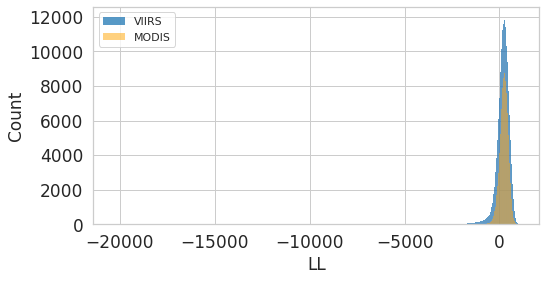

In [92]:
fig = plt.figure(figsize=(8,4))

ax = sns.histplot(data=viirs_tbl, x='LL',alpha=0.75, stat='count',label = 'VIIRS')
ax = sns.histplot(data=modis_tbl, x='LL',color='orange',alpha=0.5, stat='count',label = 'MODIS')
plotting.set_fontsize(ax, 17.)
plt.legend()
plt.show()


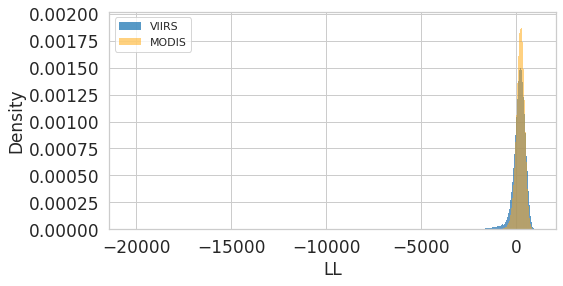

In [93]:
fig = plt.figure(figsize=(8,4))

ax = sns.histplot(data=viirs_tbl, x='LL',alpha=0.75, stat='density',label = 'VIIRS')
ax = sns.histplot(data=modis_tbl, x='LL',color='orange',alpha=0.5, stat='density',label = 'MODIS')
plotting.set_fontsize(ax, 17.)
plt.legend()
plt.show()


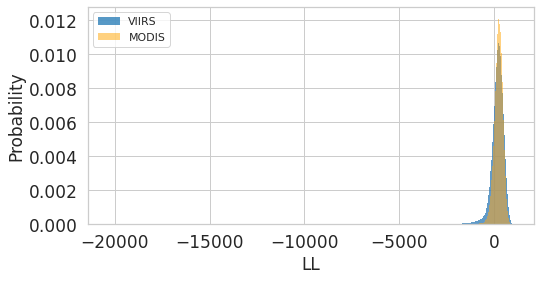

In [94]:
fig = plt.figure(figsize=(8,4))

ax = sns.histplot(data=viirs_tbl, x='LL',alpha=0.75, stat='probability',label = 'VIIRS')
ax = sns.histplot(data=modis_tbl, x='LL',color='orange',alpha=0.5, stat='probability',label = 'MODIS')
plotting.set_fontsize(ax, 17.)
plt.legend()
plt.show()


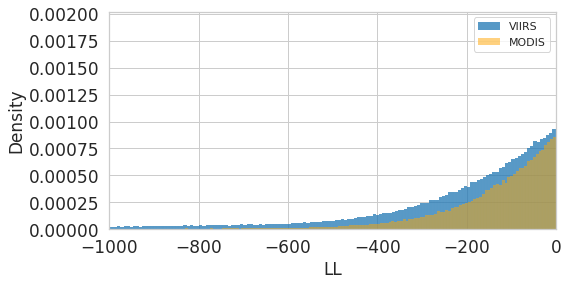

In [95]:

fig = plt.figure(figsize=(8,4))

ax = sns.histplot(data=viirs_tbl, x='LL',alpha=0.75, stat='density',label = 'VIIRS')
ax = sns.histplot(data=modis_tbl, x='LL',color='orange',alpha=0.5, stat='density',label = 'MODIS')
plotting.set_fontsize(ax, 17.)
plt.xlim(-1000,0)
plt.legend()
plt.show()


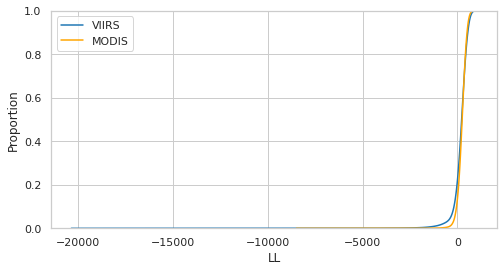

In [96]:
fig = plt.figure(figsize=(8,4))

ax = sns.ecdfplot(data=viirs_tbl, x='LL',label = 'VIIRS') 
sns.ecdfplot(data=modis_tbl, x='LL', color='orange', ax=ax, label = 'MODIS')
plt.legend()
plt.show()


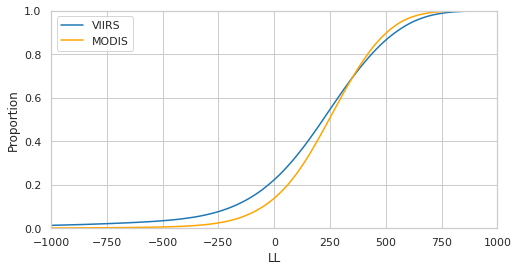

In [97]:
fig = plt.figure(figsize=(8,4))

ax = sns.ecdfplot(data=viirs_tbl, x='LL',label = 'VIIRS') 
sns.ecdfplot(data=modis_tbl, x='LL', color='orange', ax=ax,label = 'MODIS')
ax.set_xlim(-1000,1000)
plt.legend()
plt.show()


## 2019

In [98]:
viirs_tbl = viirs_tbl19
modis_tbl = modis_tbl19


In [99]:
viirs_tbl.head()

,filename,row,col,lat,lon,clear_fraction,field_size,datetime,ex_filename,pp_file,pp_root,pp_idx,pp_type,mean_temperature,Tmin,Tmax,T90,T10,LL
0,s3://viirs/data/2019/001/20190101000000-OSPO-L...,3696,260,-28.811947,2.893207,0.048069,192,2019-01-01,s3://viirs/Extractions/VIIRS_2019_95clear_192x...,s3://viirs/PreProc/VIIRS_2019_95clear_192x192_...,viirs_std,108051,0,22.879852,21.350006,24.160004,23.160004,22.589996,209.144287
1,s3://viirs/data/2019/001/20190101000000-OSPO-L...,3696,288,-28.873466,3.139442,0.015462,192,2019-01-01,s3://viirs/Extractions/VIIRS_2019_95clear_192x...,s3://viirs/PreProc/VIIRS_2019_95clear_192x192_...,viirs_std,343266,0,22.829689,21.350006,23.799988,23.116087,22.489990,259.388367
2,s3://viirs/data/2019/001/20190101000000-OSPO-L...,3744,265,-29.121992,2.816050,0.049208,192,2019-01-01,s3://viirs/Extractions/VIIRS_2019_95clear_192x...,s3://viirs/PreProc/VIIRS_2019_95clear_192x192_...,viirs_std,282308,0,22.807367,21.350006,24.019989,23.170013,22.320007,134.114136
3,s3://viirs/data/2019/001/20190101000000-OSPO-L...,3760,288,-29.272427,2.978308,0.048340,192,2019-01-01,s3://viirs/Extractions/VIIRS_2019_95clear_192x...,s3://viirs/PreProc/VIIRS_2019_95clear_192x192_...,viirs_std,366172,0,22.710859,21.350006,23.799988,23.109985,22.170013,144.690002
4,s3://viirs/data/2019/001/20190101000000-OSPO-L...,4211,960,-33.541280,8.173760,0.049533,192,2019-01-01,s3://viirs/Extractions/VIIRS_2019_95clear_192x...,s3://viirs/PreProc/VIIRS_2019_95clear_192x192_...,viirs_std,992106,0,20.786270,18.920013,21.779999,21.190002,20.310646,282.890869


In [100]:
modis_tbl.head()


,lat,lon,col,datetime,LL,row,clear_fraction,mean_temperature,Tmin,Tmax,T90,T10,filename,UID,pp_file,pp_root,field_size,pp_type,pp_idx
11606360,-29.294142,-11.516745,837,2019-02-07 02:10:00,123.881287,1232,0.049438,25.684576,22.465000,26.674999,26.084999,25.230000,AQUA_MODIS.20190207T021000.L2.SST.nc,154960705916848326,s3://modis-l2/PreProc/MODIS_R2019_2019_95clear...,standard,128,0,0
11606361,42.557450,28.580969,550,2019-04-21 00:05:00,419.498108,1409,0.048645,9.969158,9.440000,10.745000,10.175000,9.770000,AQUA_MODIS.20190421T000500.L2.SST.nc,1555132557520858097,s3://modis-l2/PreProc/MODIS_R2019_2019_95clear...,standard,128,0,1
11606362,34.970930,28.369764,229,2019-07-13 23:45:00,-137.231750,208,0.000000,24.646328,22.180000,25.984999,25.394999,23.475000,AQUA_MODIS.20190713T234501.L2.SST.nc,1563124970920836976,s3://modis-l2/PreProc/MODIS_R2019_2019_95clear...,standard,128,0,2
11606363,20.297197,71.704190,357,2019-02-08 20:50:00,90.180725,208,0.041321,21.573326,18.980000,24.144999,23.289999,20.080000,AQUA_MODIS.20190208T205001.L2.SST.nc,1549110297225170419,s3://modis-l2/PreProc/MODIS_R2019_2019_95clear...,standard,128,0,3
11606364,20.832533,145.325800,747,2019-07-07 16:10:00,173.312378,773,0.049866,30.616932,27.974998,32.020000,30.949999,30.264999,AQUA_MODIS.20190707T161001.L2.SST.nc,1562110832532532580,s3://modis-l2/PreProc/MODIS_R2019_2019_95clear...,standard,128,0,4


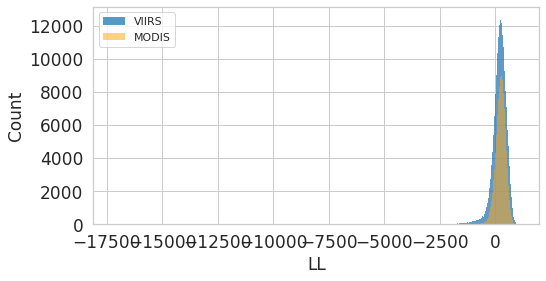

In [101]:

fig = plt.figure(figsize=(8,4))

ax = sns.histplot(data=viirs_tbl, x='LL',alpha=0.75, stat='count',label = 'VIIRS')
ax = sns.histplot(data=modis_tbl, x='LL',color='orange',alpha=0.5, stat='count',label = 'MODIS')
plotting.set_fontsize(ax, 17.)
plt.legend()
plt.show()


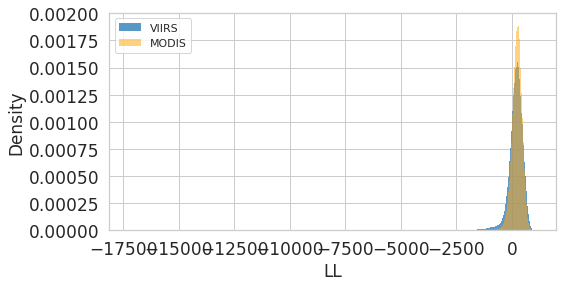

In [102]:
fig = plt.figure(figsize=(8,4))

ax = sns.histplot(data=viirs_tbl, x='LL',alpha=0.75, stat='density',label = 'VIIRS')
ax = sns.histplot(data=modis_tbl, x='LL',color='orange',alpha=0.5, stat='density',label = 'MODIS')
plotting.set_fontsize(ax, 17.)
plt.legend()
plt.show()


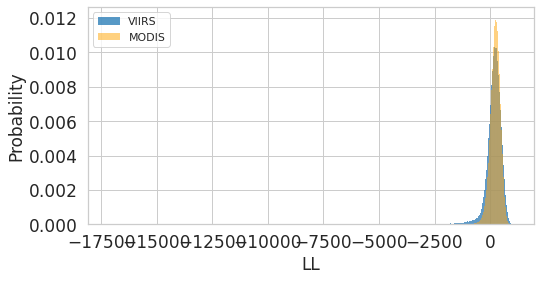

In [103]:

fig = plt.figure(figsize=(8,4))

ax = sns.histplot(data=viirs_tbl, x='LL',alpha=0.75, stat='probability',label = 'VIIRS')
ax = sns.histplot(data=modis_tbl, x='LL',color='orange',alpha=0.5, stat='probability',label = 'MODIS')
plotting.set_fontsize(ax, 17.)
plt.legend()
plt.show()


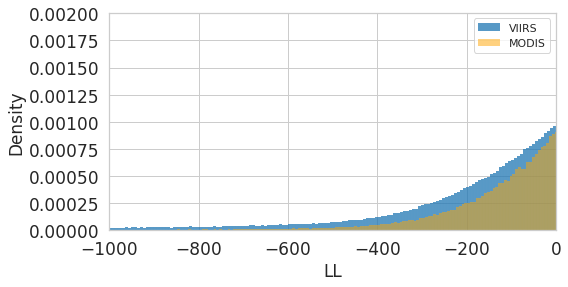

In [104]:
fig = plt.figure(figsize=(8,4))

ax = sns.histplot(data=viirs_tbl, x='LL',alpha=0.75, stat='density',label = 'VIIRS')
ax = sns.histplot(data=modis_tbl, x='LL',color='orange',alpha=0.5, stat='density',label = 'MODIS')
plotting.set_fontsize(ax, 17.)
plt.xlim(-1000,0)
plt.legend()
plt.show()


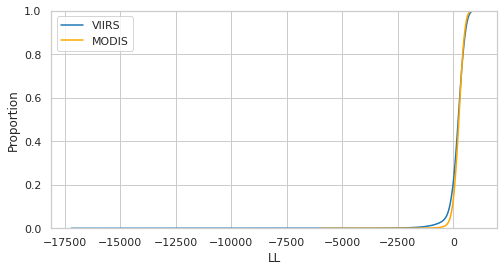

In [105]:
fig = plt.figure(figsize=(8,4))

ax = sns.ecdfplot(data=viirs_tbl, x='LL',label = 'VIIRS') 
sns.ecdfplot(data=modis_tbl, x='LL', color='orange', ax=ax, label = 'MODIS')
plt.legend()
plt.show()


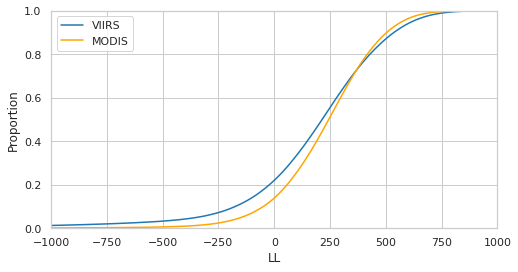

In [106]:
fig = plt.figure(figsize=(8,4))

ax = sns.ecdfplot(data=viirs_tbl, x='LL',label = 'VIIRS') 
sns.ecdfplot(data=modis_tbl, x='LL', color='orange', ax=ax,label = 'MODIS')
ax.set_xlim(-1000,1000)
plt.legend()
plt.show()
